In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
# Parameters
D = 500  # Dose in mg
V = 49  # Volume of distribution in L
t_half = 6  # Half-life in hours
tau = 12  # Dosing interval in hours

# Calculated parameters
#Ke = np.log(2) / t_half  # Elimination rate constant
#CL = V * k  # Clearance
#Buelga 2005
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL/V)#hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  




In [72]:

conc_Vancomycin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10.20408163,
       9.52832759,  8.89732461,  8.30810911,  7.75791376,  7.24415448,
  6.76441835,  6.31645221,  5.89815213,  5.50755352,  5.14282187,  4.80224416,
 14.60474615, 13.63756296, 12.7344304,  11.8911068,  11.10363138, 10.36830565,
  9.68167605,  9.04051774,  8.44181943,  7.88276926,  7.36074157,  6.87328458,
 16.45576207, 15.36599739, 14.34840118, 13.39819415, 12.51091353, 11.68239209,
 10.90873857, 10.1863194,   9.51174164,  8.88183705,  8.29364719,  7.74440956,
 17.18700424, 16.04881385, 14.98599887, 13.99356764, 13.06685907, 12.20152075,
 11.3934885,  10.6389673,   9.93441344,  9.27651787,  8.66219072,  8.0885467,
 17.42683078, 16.27275815, 15.19511271, 14.18883314, 13.24919333, 12.37178012,
 11.55247264, 10.78742289, 10.07303772,  9.40596191,  8.78306247,  8.20141385,
 17.45137048, 16.29567274, 15.2165098,  14.20881323, 13.26785026, 12.38920152,
 11.56874033, 10.80261327, 10.08722213,  9.41920698,  8.79543039,  8.21296272,
 17.38196366, 16.2308623,  15.15599136, 14.15230256, 13.21508195, 12.33992773,
 11.52272964, 10.75964959, 10.04710367,  9.38174532,  8.76044959,  8.18029849,
 17.27192833, 16.12811394, 15.0600474,  14.06271239, 13.13142478, 12.26181067,
 11.44978579, 10.69153637,  9.98350117,  9.32235483,  8.70499217,  8.12851367,
 17.14468994, 16.00930177, 14.94910343, 13.95911556]

time_Vancomycin = np.linspace(0, 148, 148)
print(len(conc_Vancomycin))
print(len(time_Vancomycin))

148
148


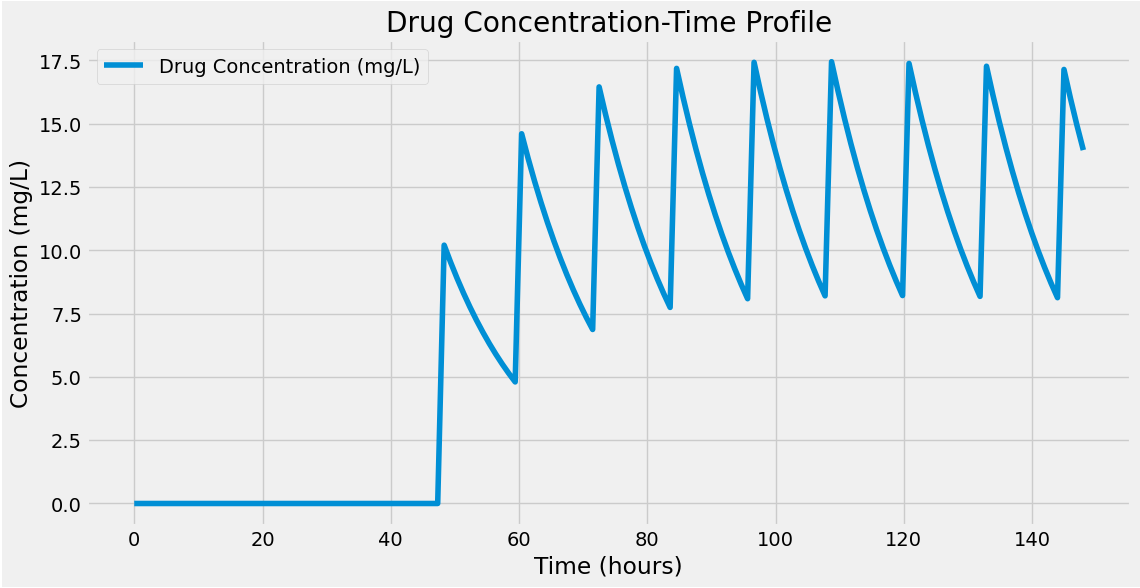

In [74]:
# Plot the concentration-time profile
#plt.rcParams['lines.linewidth'] = 1
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6), linewidth = 0.75)
ax.plot(time_Vancomycin, conc_Vancomycin, label='Drug Concentration (mg/L)')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Concentration (mg/L)')
ax.set_title('Drug Concentration-Time Profile')
plt.legend()
plt.grid(True)
#plt.savefig("concentration-time")

In [64]:
#Vancomycin concentrations
conc_Vancomycin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 10.20408163,
       9.52832759,  8.89732461,  8.30810911,  7.75791376,  7.24415448,
  6.76441835,  6.31645221,  5.89815213,  5.50755352,  5.14282187,  4.80224416,
 14.60474615, 13.63756296, 12.7344304,  11.8911068,  11.10363138, 10.36830565,
  9.68167605,  9.04051774,  8.44181943,  7.88276926,  7.36074157,  6.87328458,
 16.45576207, 15.36599739, 14.34840118, 13.39819415, 12.51091353, 11.68239209,
 10.90873857, 10.1863194,   9.51174164,  8.88183705,  8.29364719,  7.74440956,
 17.18700424, 16.04881385, 14.98599887, 13.99356764, 13.06685907, 12.20152075,
 11.3934885,  10.6389673,   9.93441344,  9.27651787,  8.66219072,  8.0885467,
 17.42683078, 16.27275815, 15.19511271, 14.18883314, 13.24919333, 12.37178012,
 11.55247264, 10.78742289, 10.07303772,  9.40596191,  8.78306247,  8.20141385,
 17.45137048, 16.29567274, 15.2165098,  14.20881323, 13.26785026, 12.38920152,
 11.56874033, 10.80261327, 10.08722213,  9.41920698,  8.79543039,  8.21296272,
 17.38196366, 16.2308623,  15.15599136, 14.15230256, 13.21508195, 12.33992773,
 11.52272964, 10.75964959, 10.04710367,  9.38174532,  8.76044959,  8.18029849,
 17.27192833, 16.12811394, 15.0600474,  14.06271239, 13.13142478, 12.26181067,
 11.44978579, 10.69153637,  9.98350117,  9.32235483,  8.70499217,  8.12851367,
 17.14468994, 16.00930177, 14.94910343, 13.95911556]
print(len(conc_Vancomycin))

#Time-dependent death rate parameter, deltaS
w = np.array([0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0,
       0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0,  0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8,
       0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

print(len(w))

#Time-dependent death rate parameter, deltaR
i = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002])
print(len(i))

time = np.linspace(0, 148, 148)
len(time)

148
148
148


148

In [68]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the time variable (example values, adjust as needed)
#time = np.linspace(0, 148, 149)  # Create a time array from 0 to 148 with 149 points

# Example values for w and i (these should be defined based on your specific use case)
#w = np.array([0.002] * 149)  # Placeholder for death rate sensitive
#i = np.array([0.002] * 149)  # Placeholder for death rate resistant

# Define the time-dependent parameter functions
def p(t):
    return np.interp(t, time, w)  # death rate sensitive

def v(t):
    return np.interp(t, time, i)  # death rate resistant

# System ODE
def system_ode(t, r):
    S = r[0]
    R = r[1]
    conc_t = np.interp(t, time, conc_Vancomycin)  # xp is time and fp is conc_Vancomycin
    deltaS = p(t)  # Get the current deltaS value
    deltaR = v(t)  # Get the current deltaR value
    dSdt = (1 - (conc_t / (conc_t + EC_50)) * rho * S * (1 - (S + R) / k)) - deltaS * S
    dRdt = rho * R * (1 - (S + R) / k) - deltaR * R
    return [dSdt, dRdt]

# Initial conditions and parameters
rho = 0.3466  # both sensitive and resistant SA are growing at the same rate
k = 10e5  # or 10e6
S = 20
R = 10
r = [S, R]
EC_50 = 0.03

# Solve the ODE
ode_soln = solve_ivp(system_ode, t_span=[0, 148], y0=[2, 2])
print(ode_soln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.184e-01 ...  1.470e+02  1.480e+02]
        y: [[ 2.000e+00  2.118e+00 ...  1.248e+00  1.247e+00]
            [ 2.000e+00  2.084e+00 ...  9.942e+05  9.942e+05]]
      sol: None
 t_events: None
 y_events: None
     nfev: 548
     njev: 0
      nlu: 0


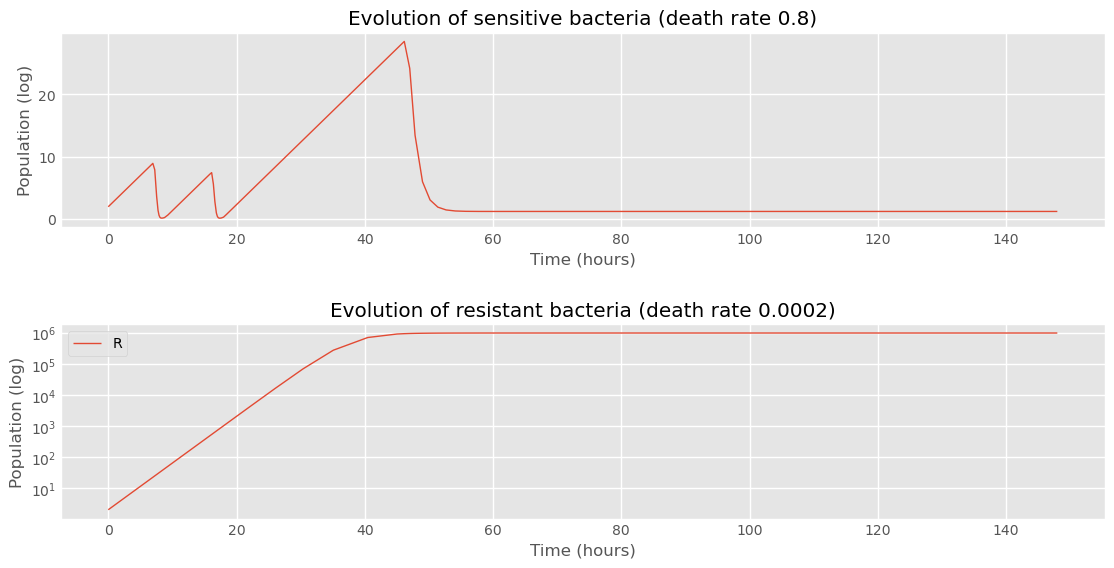

In [76]:
# Plot the ODE solution
plt.rcParams['lines.linewidth'] = 1
plt.style.use('ggplot')
fig, ax = plt.subplots(2, figsize=(12, 6))

plt.yscale("log")
ax[0].plot(ode_soln.t, ode_soln.y[0], label='S')
ax[1].plot(ode_soln.t, ode_soln.y[1], label='R')
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Population (log)')
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Population (log)')
ax[0].set_title('Evolution of sensitive bacteria (death rate 0.8)')
ax[1].set_title('Evolution of resistant bacteria (death rate 0.0002)')
fig.subplots_adjust(hspace= 0.5, wspace=0.2)  # Adjust horizontal space between plots
plt.legend()
plt.grid(True)
plt.savefig('2024-09-02Resistant0.0002.png')

## The interp function in the numpy library (numpy.interp), is used for one-dimensional linear interpolation. It allows you to estimate intermediate values within a given range based on known data points. This is particularly useful when you have a set of discrete data points and you want to find a value between them.

## How numpy.interp Works
## The function numpy.interp(x, xp, fp) takes the following parameters:

## x: The x-coordinates at which you want to interpolate.
## xp: The x-coordinates of the data points you know (must be in ascending order).
## fp: The y-coordinates of the data points you know, corresponding to xp.